# Tekst data i Python: Håndtering af tekstdata og ’text mining’

I dag ser vi på, hvordan tekster kan analyseres kvantitativt. Der introduceres diverse "text mining"-teknikker samt usuperviseret maskinlæring i form af latent dirichlet allocation til at inddele tekster i temaer.

Der arbejdes med data fra Twitter og fra Reddit i løbet af sessionen.

**Indhold**
1. Introduktion: Tekst og maskinlæring
2. Sentiment analysis i Python
3. Håndtering af tekst (strings) i Python
4. Bearbejdning/"pre-processing" af tekst (tokenization)
5. Introduktion til sprogmodeller
6. Tokenization med sprogmodeller
7. Simple text mining teknikker

# Hvorfor beskæftige sig med tekst kvantitativt?

![climatenw](https://raw.githubusercontent.com/CALDISS-AAU/course_ndms-I/master/notebooks/img/climatenw.png)

Tekst har altid været en yderst relevant datakilde for samfundsvidenskaberne; om så det gælder artikler, interviewtransskriberinger, juridiske dokumenter, nyheder eller andet. 

Derudover produceres der uanede mængder af tekstdata fra sociale medier som Facebook, Twitter, Reddit osv. Internettet og sociale medier er i dag unægteligt forbundet til det sociale liv. 

**Udfordringen med tekstdata**

Fra et analytisk synspunkt er der to primære udfordringer med tekst: volumen (der er rigtig meget af det) og formatet (det er ustruktureret). I samfundsvidenskaberne har man derfor længe opgivet kvantitativ analyse af tekst, da de kvantitative metoder, som oftest anvendes i samfundsvidenskaberne, ikke egner sig til denne type data. Som konsekvens deraf, har tekstdata automatisk været forbundet med kvalitativ analyse.

Kvalitativ analyse kan dog ikke håndtere udfordringen om volumen: Et menneske kan ikke alene behandle så meget information. Behandling af store datamængder er netop det computerteknologi hjælper os med, og i dag findes der også mange teknikker til at analysere tekstdata kvantitativt. Dog kan det diskuteres, om disse (på nuværende tidspunkt) kan tjene som en erstatning for den kvalitative forskning, eller om teknikkerne kan bidrage til at kvalificere, validere eller informere kvalitativ forskning. 

**Muligheder med kvantitative/computationelle metoder**

Selvom der i dag findes mange metoder og teknikker til at behandle tekst, så er brugen af disse til at bedrive samfundsvidenskabelig forskning stadig ikke særlig udbredt. Det betyder på den ene side, at der er mange uudforskede muligheder derude, men det betyder også, at der ikke er etableret faste traditioner for brug af disse metoder, og der er ej heller konsensus om, hvordan output af maskinlæringsmodeller brugt på tekst skal tolkes epistemologisk.

Formålet med dagens lektion er at introducere til brug af kvantiative metoder på tekst, men der argumenteres ikke for, at disse kan erstatte den kvalitative forskning. 

# Tekst og maskinlæring

## Udfordringer med tekstdata

- Store mængder
- Ustruktureret
- Varieret indhold
- Effektiv og ensartet klassificering (kvalitativ/kvantitativ)

## Tekstanalysemodeller (Grimmer & Stewart 2013)

![textana](https://raw.githubusercontent.com/CALDISS-AAU/course_ndms-I/master/notebooks/img/text-data-models.png)

Overordnet set hjælper maskinlæring på tekst med én ting: klassifikation. 

*Superviseret* maskinlæring kan hjælpe med at klassificere tekst efter kategorier, som er kendte af forskeren. Her listes nogen eksempler på brug af superviseret maskinlæring på tekst:
- Sentiment analysis: Kategorisering af tekst efter udtryke følelser (fx positiv/negativ)
- Named Entity Recognition (NER): Identificering af nøgleoplysninger i tekst (fx navne, virksomheder)
- Generel klassificering: Hvad handler tekststykket om?
- Brug af sprogmodeller: Sætningskonstruktion, tekstopbygning
- Word embedding teknikker: Analyse af ords betydning gennem deres kontekst (computationelt)

Fælles for superviseret maskinlæring på tekst er, at modeller skal gives information om, hvordan kategorier ser ud i teksten. Dette sker ofte gennem manuel kategorisering/annotering (kaldes også at træne en model).

*Usuperviseret* maskinlæring kan hjælpe os med at klassificere tekst efter kategorier, som *ikke* er kendt af forskeren. Det inkluderer blandt andet:
- Klyngeanalyser: Gruppering efter ensartethed af teksterne
- Topic models: Udledning af underliggende emner i teksterne
- Netværksanalyser: Ord i kontekst analyseret som netværk (visuelt)


Fælles for usuperviseret maskinlæring på tekst er, at de de gives minimalt input ift. at kunne producere et output, der hjælper til at kategorisere eller inddele data. Dog er disse teknikker typisk meget sårbare over for måden, som man har forudbehandlet data (hvilke ord man har frasorteret, fx).

## Principper for automatiseret tekstanalyse (Grimmer & Stewart 2013)

---

> Quantitative Methods Augment Humans, Not Replace Them

---

> There Is No Globally Best Method for Automated Text Analysis

---

> Validate, Validate, Validate

---

## "Natural language processing" og "text mining"

Man støder på to hovedtermer, når man arbejder kvantitativt med tekst: "Natural language processing" og "text mining". De to termer bruges lidt synonymt, men er bundet op på forskellige traditioner og ophav. 

**"Natural language processing" (NLP)** er først og fremmest en computervidenskabelig disciplin. Det er en disciplin, der beskæftiger sig med at få en computer til at forstå menneskeligt sprog (talt eller skrevet). Tale-til-tekst applikationer, stemmestyring, autocorrect er alle sammen baseret på natural language processing. 

Hvis I vil se et eksempel på førende NLP-teknologi i aktion, kan I tage et kig på [AI Dungeon](https://play.aidungeon.io/).

![aidungeon](https://raw.githubusercontent.com/CALDISS-AAU/course_ndms-I/master/notebooks/img/aidungeon.png)

**"Text mining"** er primært et dataanalyse-term, der referer til metoder og teknikker, som udleder indhold, mønstre osv. i tekstdata. Text mining gør brug af NLP, da det er teknikkerne udviklet i NLP, der hjælper os til at få computeren til at forstå teksten, som vi undersøger.

## Text mining workflow i Python: Et eksempel

Herunder ses et eksempel på et text mining workflow i Python.

Det indeholder følgende:
- Import af relevante pakker
- Indlæsning af data
- Definere tokenizer funktion (med `spaCy`)
- Tokenize tekstdata
- Konverter data til tidy format
- Ordoptælling (her hyppigste termer i tweets fordelt på politisk parti)

In [2]:
# Import af pakker

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import spacy
import re

# Download ressourcer
#!python -m spacy download da_core_news_sm # download sprogmodel

# Sæt visualiseringsindstillinger
%matplotlib inline
sns.set(rc={'figure.figsize':(20,10)})

In [3]:
# Indlæsning af data
tweetdata_url = "https://raw.githubusercontent.com/CALDISS-AAU/course_ndms-I/master/datasets/poltweets_sample.csv"
tweets_df = pd.read_csv(tweetdata_url)
tweets_df.shape

(5500, 13)

In [4]:
# Definer tokenizer
nlp = spacy.load("da_core_news_sm") # Indlæser sprogmodel

# Ændring af tokenizer
re_token_match = spacy.tokenizer._get_regex_pattern(nlp.Defaults.token_match) # Indlæs regex fra sprogmodel
re_token_match = f"({re_token_match}|#\\w+)" # tilføj hashtag-pattern
nlp.tokenizer.token_match = re.compile(re_token_match).match # opdater tokenizer

def tokenizer_spacy(text): 
    custom_stops = ["god", "al", "stor", "ny", "tak", "dag"] 
    default_stopwords = list(nlp.Defaults.stop_words) 
    stop_words = default_stopwords + custom_stops 
    pos_tags = ['PROPN', 'ADJ', 'NOUN'] 

    doc = nlp(text)

    tokens = []

    for word in doc:
        if word.lemma_.startswith("@"): # ignorer @
            continue 
        if word.lemma_.startswith("#"): # ignorer hashtags
            continue 
        if (len(word.lemma_) < 3): # ignorer ord kortere end 3 tegn
            continue
        if (word.pos_ in pos_tags) and (word.lemma_ not in stop_words): # behold kun ord med bestemt POS-tag, som ikke er et stopord
            tokens.append(word.lemma_)
                
    return(tokens)

In [18]:
# Anvend tokenizer på data (tager lang tid, så indlæs i forvejen tokenized data)
#tweets_df['tokens'] = tweets_df['full_text'].apply(tokenizer_spacy)

In [5]:
# Indlæs tokenized data, hvis nødvendigt
import ast
tweets_df = pd.read_csv("https://raw.githubusercontent.com/CALDISS-AAU/course_ndms-I/master/datasets/poltweets_sample_tokens.csv")
tweets_df['tokens'] = tweets_df['tokens'].apply(ast.literal_eval)

In [7]:
# Data til tidy format
tweets_df_tidy = tweets_df.explode('tokens')

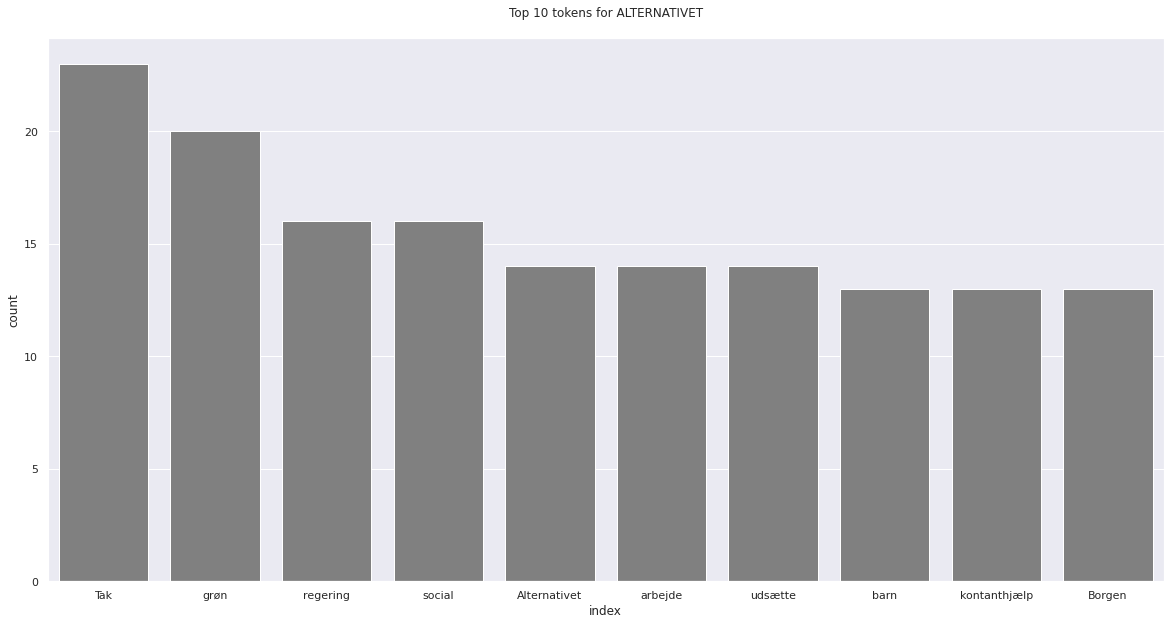

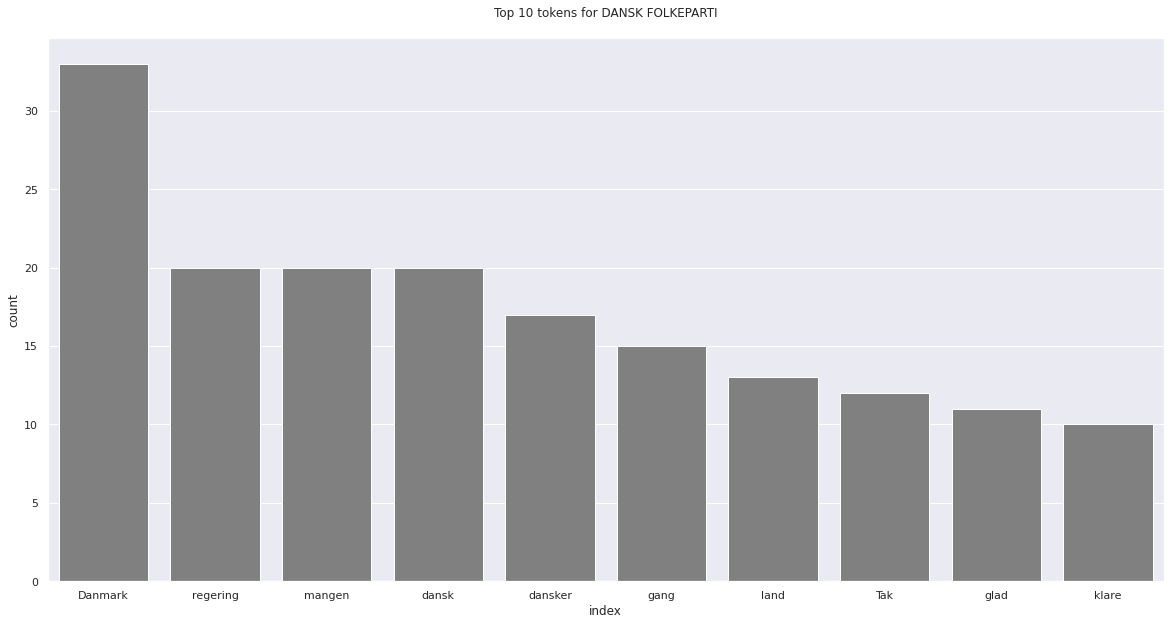

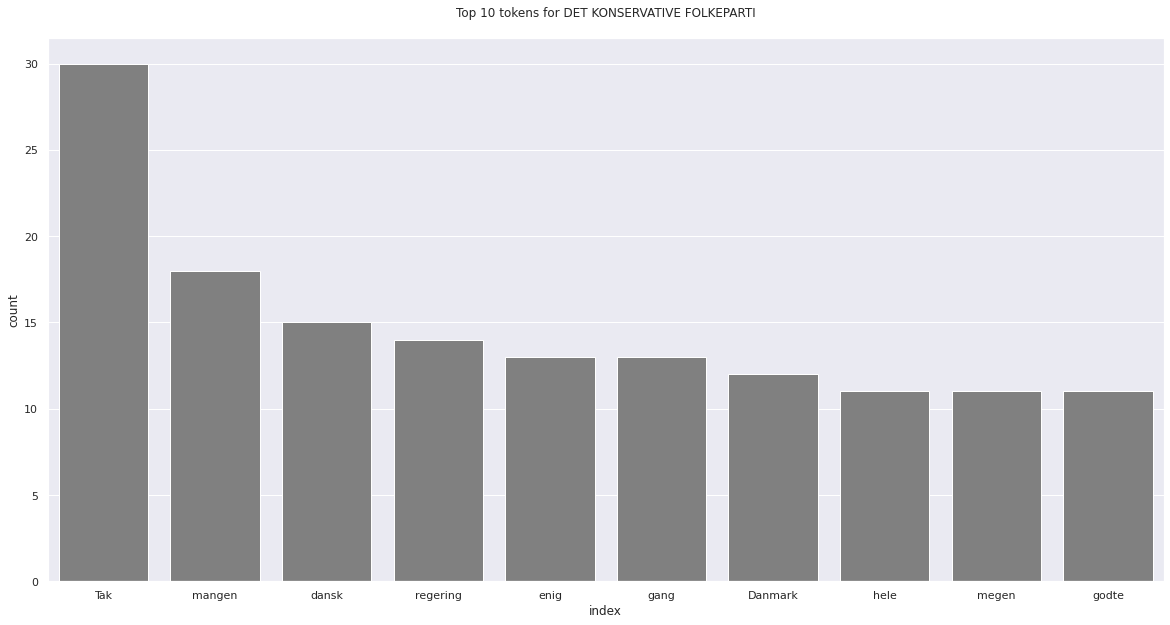

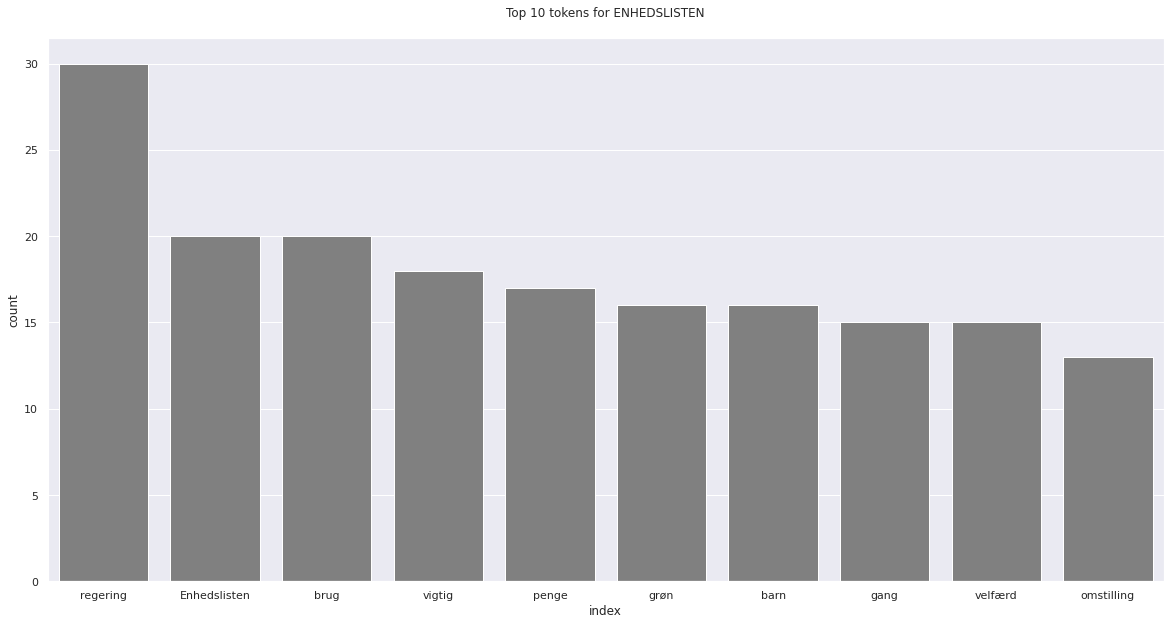

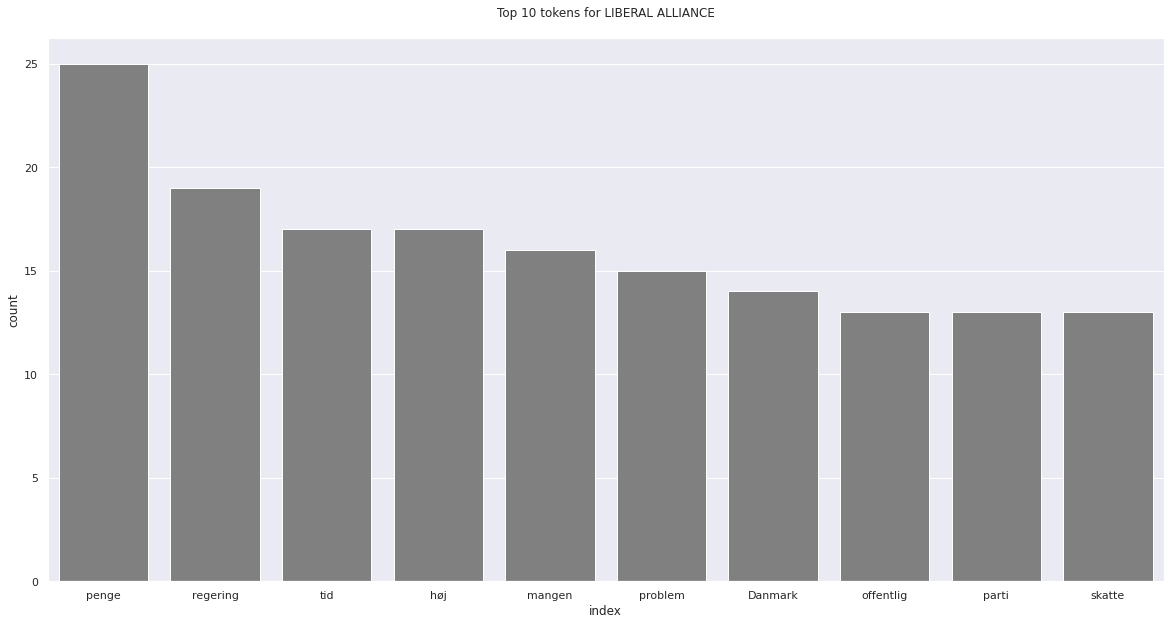

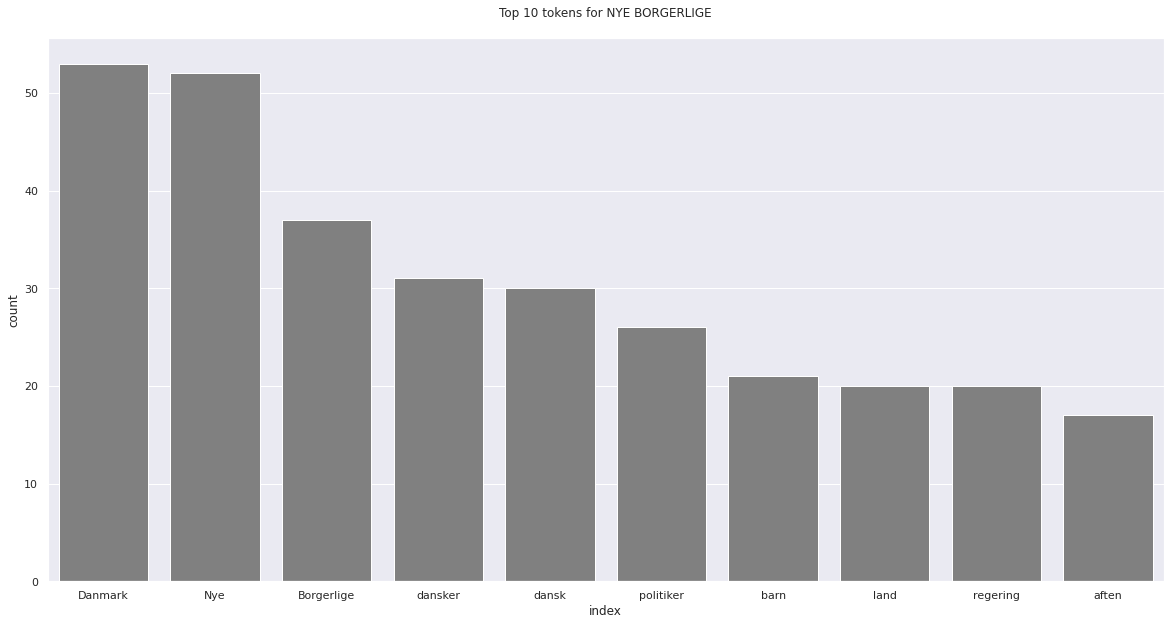

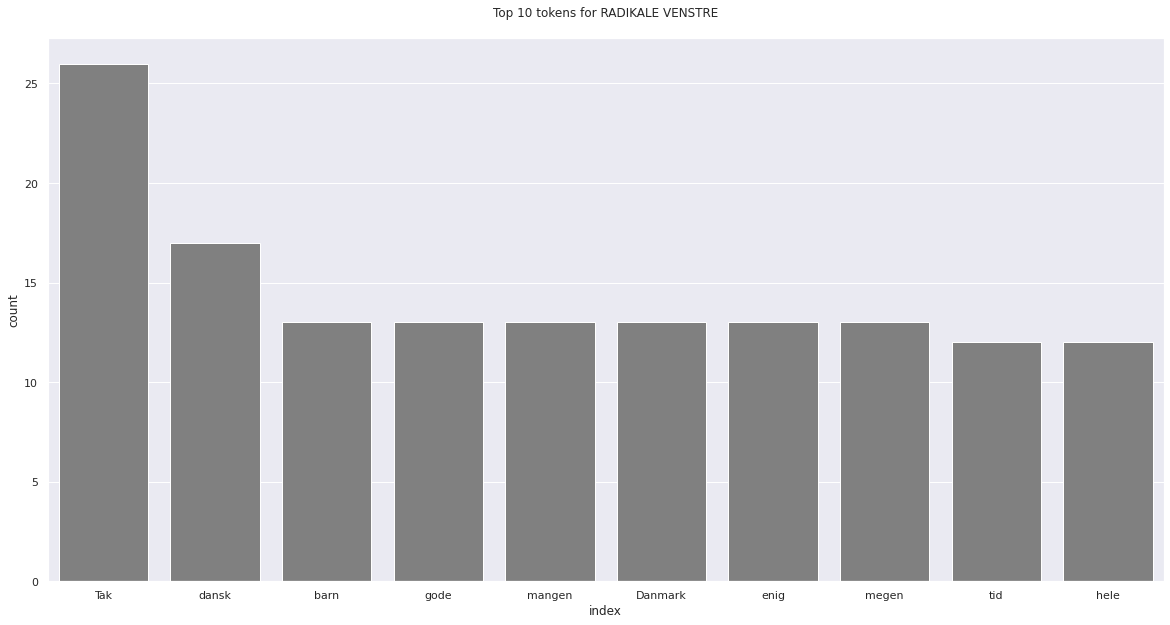

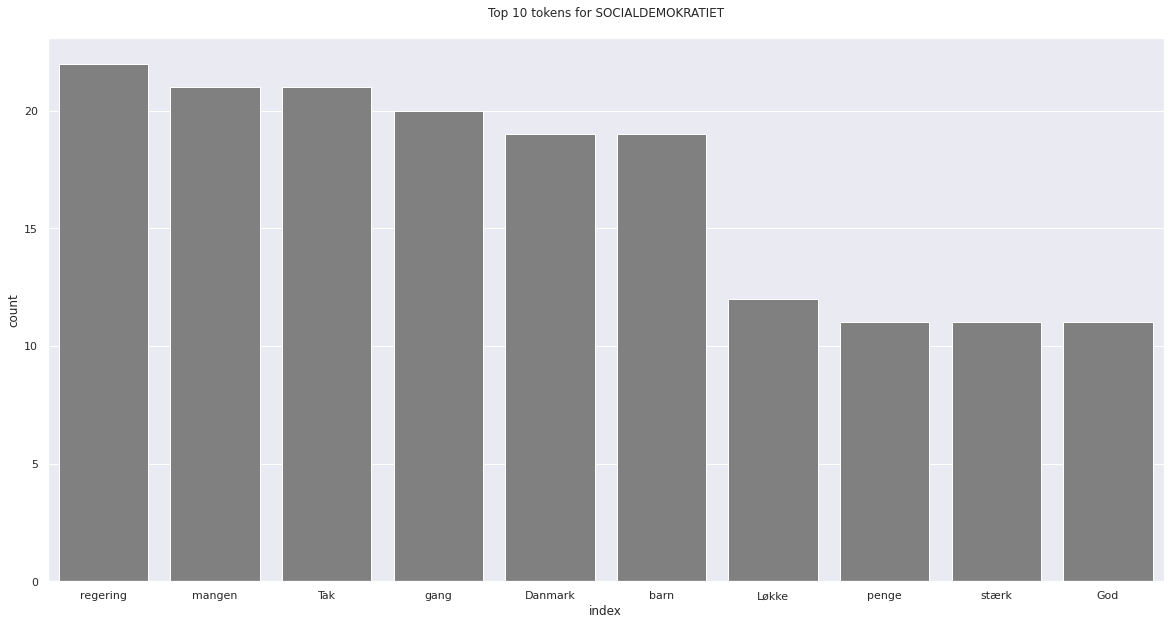

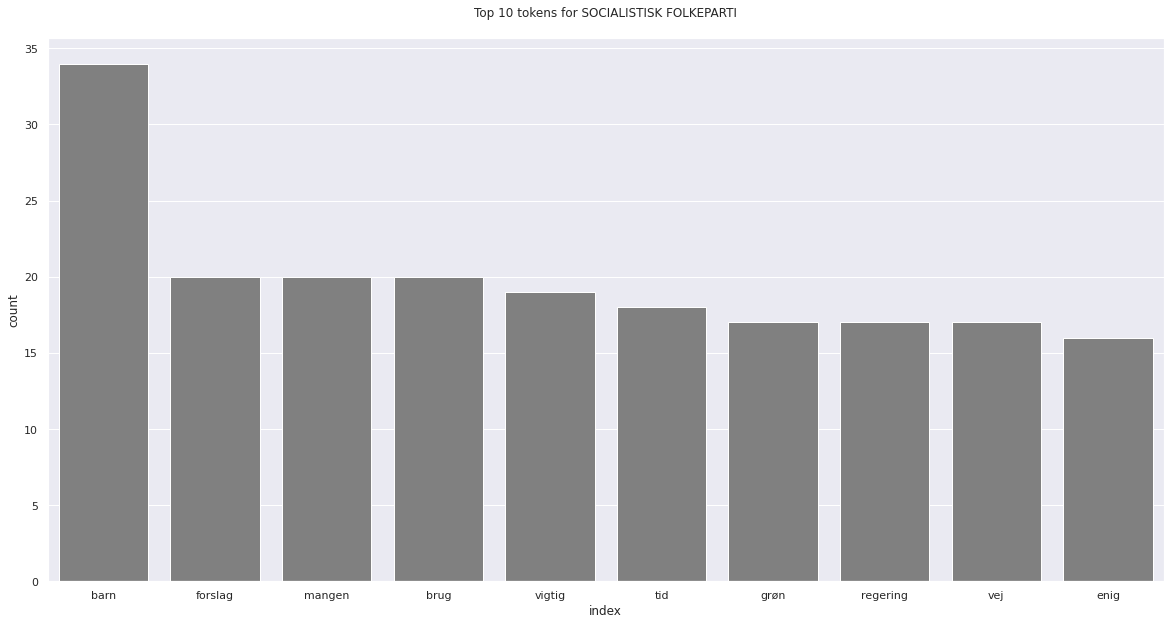

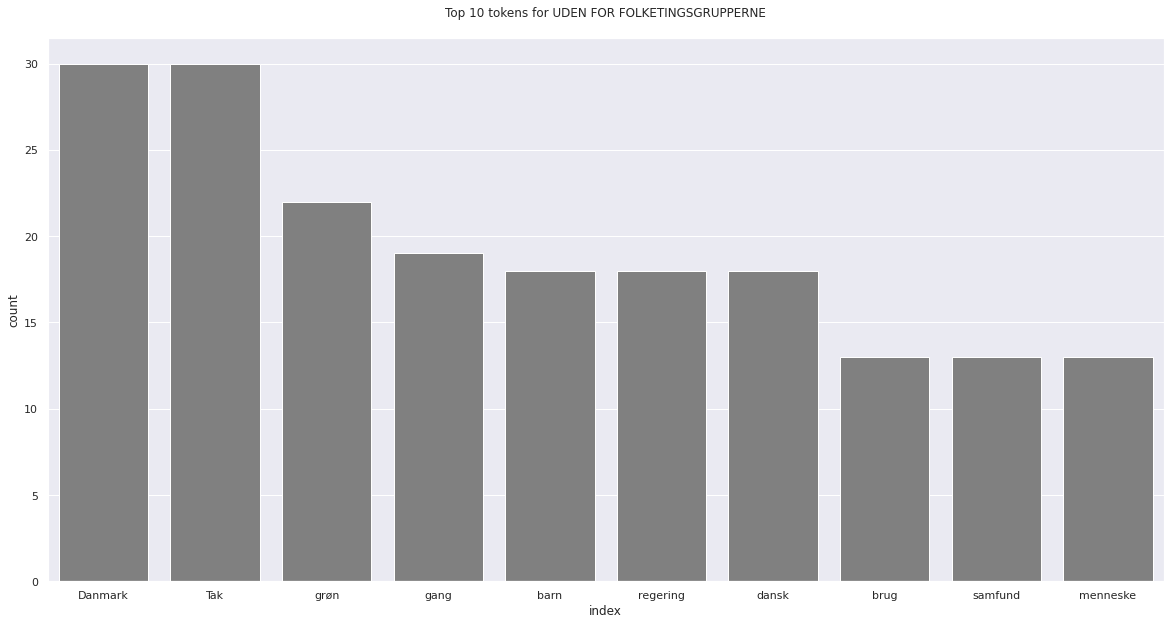

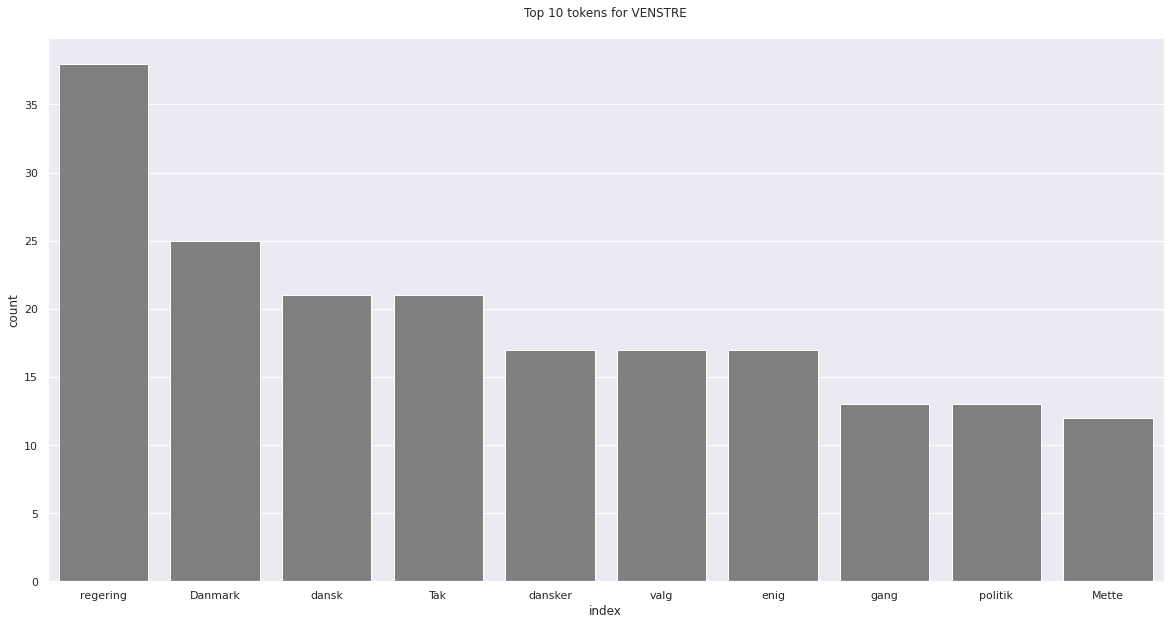

In [8]:
# Optælling af top 10 tokens for hvert parti
for party in tweets_df_tidy['party'].unique():
    count_table = tweets_df_tidy.loc[tweets_df_tidy['party'] == party, 'tokens'].value_counts()[0:10].to_frame(name = 'count').reset_index()
    plt.figure()
    sns.barplot(data = count_table, x = 'index', y = 'count', color = 'grey').set_title(f"Top 10 tokens for {party.upper()}\n")

<AxesSubplot:xlabel='tokens', ylabel='count'>

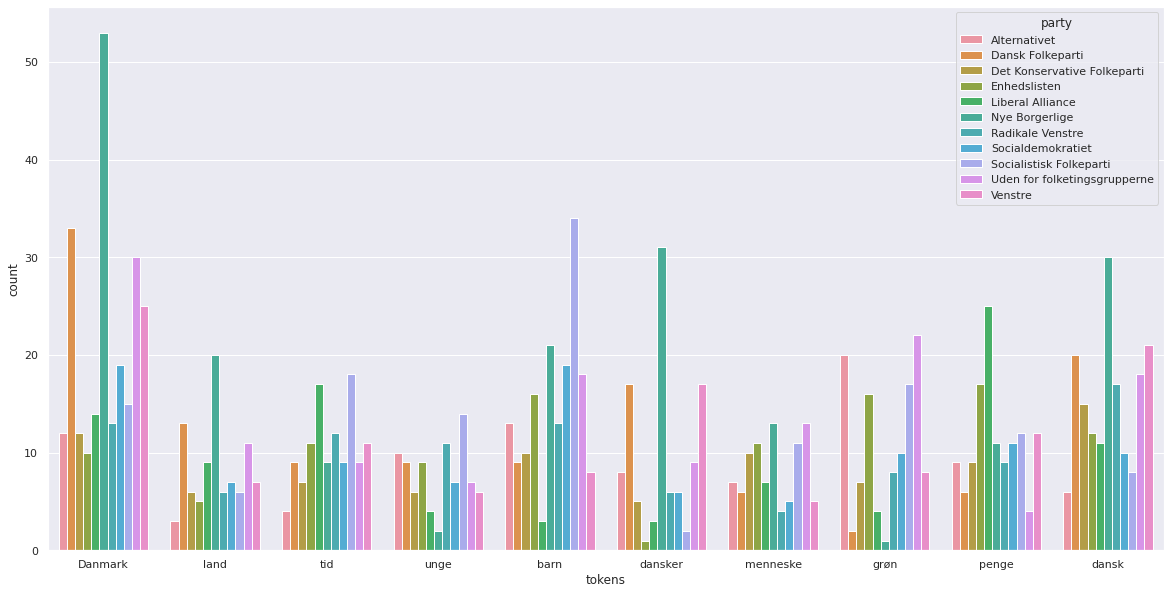

In [9]:
tokens_select = ['Danmark', 'dansk', 'barn', 'penge', 'tid', 'grøn', 'dansker', 'land', 'menneske', 'unge']
tweets_df_select = tweets_df_tidy.loc[tweets_df_tidy['tokens'].isin(tokens_select),:]
sns.countplot(data = tweets_df_select, x = 'tokens', hue = 'party')